## Assignment 3 - Rakshit Sareen, Shubhanshu Surana - rs5606, ss11012

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import timedelta as td

In [2]:
data = pd.read_csv('conv.csv', infer_datetime_format = True, header = 0, parse_dates = [0])

In [3]:
data.head()

,DateTime,Bid,Ask
0,2018-01-07 22:02:03.832,1.35560,1.35616
1,2018-01-07 22:02:03.845,1.35560,1.35617
2,2018-01-07 22:02:03.851,1.35554,1.35617
3,2018-01-07 22:02:03.859,1.35554,1.35618
4,2018-01-07 22:02:04.114,1.35554,1.35619


In [4]:
data.shape

(1537052, 3)

In [5]:
data.columns

Index(['DateTime', 'Bid', 'Ask'], dtype='object')

In [6]:
orders = pd.read_excel('Assignment#3_Orders.xlsx')

In [7]:
type(orders)

pandas.core.frame.DataFrame

In [8]:
orders.head()

,trade_id,buy/sell,notional,price,datetime,instrument,alpha
0,107414,1,150000,1.35724,2018-01-07 19:07:49,GBP/USD,SOM
1,107427,1,310000,1.35725,2018-01-07 19:15:23,GBP/USD,SOM
2,107638,-1,310000,1.35453,2018-01-08 07:38:48,GBP/USD,SOM
3,107649,-1,310000,1.35371,2018-01-08 08:10:55,GBP/USD,SOM
4,107654,-1,320000,1.35394,2018-01-08 08:19:10,GBP/USD,SOM


In [9]:
data['Spread'] = data['Ask'] - data['Bid']

In [10]:
data.head()

,DateTime,Bid,Ask,Spread
0,2018-01-07 22:02:03.832,1.35560,1.35616,0.00056
1,2018-01-07 22:02:03.845,1.35560,1.35617,0.00057
2,2018-01-07 22:02:03.851,1.35554,1.35617,0.00063
3,2018-01-07 22:02:03.859,1.35554,1.35618,0.00064
4,2018-01-07 22:02:04.114,1.35554,1.35619,0.00065


In [11]:
type(data['DateTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
type(orders['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
data['DateTime'][0] > orders['datetime'][0]

True

In [14]:
type(data['Bid'][0])

numpy.float64

In [15]:
data.describe().round(2)

,Bid,Ask,Spread
count,1537052.00,1537052.00,1537052.0
mean,1.36,1.36,0.0
std,0.01,0.01,0.0
min,1.35,1.35,-0.0
25%,1.35,1.35,0.0
50%,1.35,1.35,0.0
75%,1.36,1.36,0.0
max,1.37,1.37,0.0


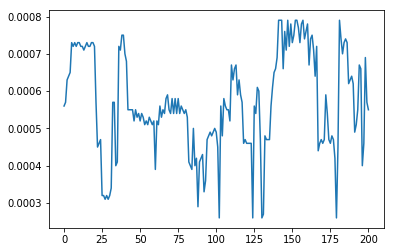

In [16]:
plt.plot(data.loc[0:200 ,'Spread'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537052 entries, 0 to 1537051
Data columns (total 4 columns):
DateTime    1537052 non-null datetime64[ns]
Bid         1537052 non-null float64
Ask         1537052 non-null float64
Spread      1537052 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 46.9 MB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
trade_id      369 non-null int64
buy/sell      369 non-null int64
notional      369 non-null int64
price         369 non-null float64
datetime      369 non-null datetime64[ns]
instrument    369 non-null object
alpha         369 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 20.3+ KB


In [19]:
orders['datetime'].min(), orders['datetime'].max() 

(Timestamp('2018-01-07 19:07:49'), Timestamp('2018-01-12 16:33:22'))

In [20]:
data['DateTime'].min(), data['DateTime'].max()

(Timestamp('2018-01-07 22:02:03.832000'),
 Timestamp('2018-01-12 21:58:57.957000'))

In [21]:
orders['MT_PnL'] = 0.0
print(type(orders['MT_PnL'][0]))

<class 'numpy.float64'>


In [22]:
orders.head()

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL
0,107414,1,150000,1.35724,2018-01-07 19:07:49,GBP/USD,SOM,0.0
1,107427,1,310000,1.35725,2018-01-07 19:15:23,GBP/USD,SOM,0.0
2,107638,-1,310000,1.35453,2018-01-08 07:38:48,GBP/USD,SOM,0.0
3,107649,-1,310000,1.35371,2018-01-08 08:10:55,GBP/USD,SOM,0.0
4,107654,-1,320000,1.35394,2018-01-08 08:19:10,GBP/USD,SOM,0.0


In [23]:
orders = orders[2:]
orders.head()

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL
2,107638,-1,310000,1.35453,2018-01-08 07:38:48,GBP/USD,SOM,0.0
3,107649,-1,310000,1.35371,2018-01-08 08:10:55,GBP/USD,SOM,0.0
4,107654,-1,320000,1.35394,2018-01-08 08:19:10,GBP/USD,SOM,0.0
5,107664,-1,200000,1.35405,2018-01-08 08:23:16,GBP/USD,SOM,0.0
6,107670,-1,490000,1.35423,2018-01-08 08:34:40,GBP/USD,SOM,0.0


# Market Taking Strategy

In [24]:
def calculate_market_taking_pnl(tickdata, localorders):
    tindex = 0
    for index, order in localorders.iterrows():
        while(tindex < tickdata.shape[0] and order['datetime'] > tickdata.loc[tindex, 'DateTime']):
            tindex += 1
        final_index = tindex - 1 if tindex > 0 else tindex
        # now execute the order
        if(final_index < tickdata.shape[0]):
            orders.loc[index, 'MT_PnL'] = - order['notional'] * 0.5 * tickdata.loc[final_index, 'Spread']
#             print(index , orders.loc[index, 'MT_PnL'])

In [25]:
calculate_market_taking_pnl(data, orders)

In [26]:
orders.head(10).round(2)

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL
2,107638,-1,310000,1.35453,2018-01-08 07:38:48,GBP/USD,SOM,-1.55
3,107649,-1,310000,1.35371,2018-01-08 08:10:55,GBP/USD,SOM,-7.75
4,107654,-1,320000,1.35394,2018-01-08 08:19:10,GBP/USD,SOM,-6.40
5,107664,-1,200000,1.35405,2018-01-08 08:23:16,GBP/USD,SOM,-3.00
6,107670,-1,490000,1.35423,2018-01-08 08:34:40,GBP/USD,SOM,-4.90
7,107726,1,200000,1.35716,2018-01-08 11:25:13,GBP/USD,SOM,-3.00
8,107733,1,310000,1.35693,2018-01-08 11:42:08,GBP/USD,SOM,-7.75
9,107737,1,310000,1.35676,2018-01-08 12:15:34,GBP/USD,SOM,-6.20
10,107738,1,310000,1.35677,2018-01-08 12:15:35,GBP/USD,SOM,-6.20
11,107739,1,320000,1.35645,2018-01-08 12:20:20,GBP/USD,SOM,-4.80


In [27]:
orders.iloc[0]['MT_PnL']

-1.5499999999757375

/Users/rakshitsareen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


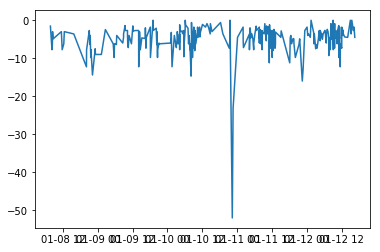

In [28]:
plt.plot(orders['datetime'], orders['MT_PnL'])

In [29]:
orders.shape

(367, 8)

In [30]:
market_taking_describe = orders['MT_PnL'].describe()
market_taking_describe

count    367.000000
mean      -4.761553
std        3.730704
min      -52.000000
25%       -6.200000
50%       -4.000000
75%       -2.700000
max       -0.000000
Name: MT_PnL, dtype: float64

In [31]:
orders.tail(10).round(2)

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL
359,110438,-1,220000,1.37,2018-01-12 13:04:03,GBP/USD,SOM,-4.4
360,110456,-1,180000,1.37,2018-01-12 14:06:24,GBP/USD,MAR,-4.5
361,110467,1,240000,1.37,2018-01-12 14:33:14,GBP/USD,MAR,-2.4
362,110469,1,180000,1.37,2018-01-12 15:02:01,GBP/USD,DIS,-0.0
363,110485,1,180000,1.37,2018-01-12 15:17:02,GBP/USD,DIS,-3.6
364,110500,1,180000,1.37,2018-01-12 15:32:12,GBP/USD,DIS,-0.0
365,110520,1,180000,1.37,2018-01-12 16:03:23,GBP/USD,MAR,-2.7
366,110523,1,180000,1.37,2018-01-12 16:03:24,GBP/USD,MAR,-2.7
367,110524,1,180000,1.37,2018-01-12 16:18:07,GBP/USD,MAR,-1.8
368,110533,1,180000,1.37,2018-01-12 16:33:22,GBP/USD,MAR,-4.5


# OMM-Mid Calculations

In [32]:
data['midprice'] = (data['Bid'] + data['Ask']) / 2
data.head()

,DateTime,Bid,Ask,Spread,midprice
0,2018-01-07 22:02:03.832,1.35560,1.35616,0.00056,1.355880
1,2018-01-07 22:02:03.845,1.35560,1.35617,0.00057,1.355885
2,2018-01-07 22:02:03.851,1.35554,1.35617,0.00063,1.355855
3,2018-01-07 22:02:03.859,1.35554,1.35618,0.00064,1.355860
4,2018-01-07 22:02:04.114,1.35554,1.35619,0.00065,1.355865


In [33]:
orders['omm_mid_pnl'] = 0
orders.head()

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL,omm_mid_pnl
2,107638,-1,310000,1.35453,2018-01-08 07:38:48,GBP/USD,SOM,-1.55,0
3,107649,-1,310000,1.35371,2018-01-08 08:10:55,GBP/USD,SOM,-7.75,0
4,107654,-1,320000,1.35394,2018-01-08 08:19:10,GBP/USD,SOM,-6.40,0
5,107664,-1,200000,1.35405,2018-01-08 08:23:16,GBP/USD,SOM,-3.00,0
6,107670,-1,490000,1.35423,2018-01-08 08:34:40,GBP/USD,SOM,-4.90,0


In [34]:
def omm_mid(tickdata, localorders, max_tte, stoploss):
    tindex = 0
    for index, order in localorders.iterrows():
        time_to_execute = td(seconds = max_tte)
        time_to_execute = order.loc['datetime'] + time_to_execute
        while(tindex < tickdata.shape[0] and order['datetime'] > tickdata.loc[tindex, 'DateTime']):
            tindex += 1
        final_index = tindex - 1 if tindex > 0 else tindex
        iter_index = final_index
        start_price = tickdata.loc[iter_index, 'midprice']
        start_time = order.loc['datetime']
        while iter_index <= tickdata.shape[0]:
            if(time_to_execute <= tickdata.loc[iter_index, 'DateTime']):
                #execute the order
                if(order['buy/sell'] == 1):
                    orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (start_price - tickdata.loc[iter_index, 'Ask'])
                else:
                    orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_price)
                orders.loc[index, 'mid_tte'] = True
                orders.loc[index, 'mid_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
            
            elif((start_price >= tickdata.loc[iter_index, 'Ask'] and order['buy/sell'] == 1) or (start_price <= tickdata.loc[iter_index, 'Bid'] and order['buy/sell'] == -1)):
                # execute the order
                if(order['buy/sell'] == 1):
                    orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (start_price - tickdata.loc[iter_index, 'Ask'])
                else:
                    orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_price)
                orders.loc[index, 'mid_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            elif(order['buy/sell'] == 1 and (tickdata.loc[iter_index, 'Ask'] - start_price) / start_price >= stoploss/100):
                # execute the order
                orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (start_price - tickdata.loc[iter_index, 'Ask'])
                orders.loc[index, 'mid_stoploss'] = True 
                orders.loc[index, 'mid_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            elif(order['buy/sell'] == -1 and (start_price - tickdata.loc[iter_index, 'Bid']) / start_price >= stoploss/100):
                # execute the order
                orders.loc[index, 'omm_mid_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_price)
                orders.loc[index, 'mid_stoploss'] = True
                orders.loc[index, 'mid_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            iter_index += 1

In [35]:
omm_mid(data, orders, 10, .01)

# OMM MID results appended in orders

In [36]:
orders.round(2)

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL,omm_mid_pnl,mid_tte_val,mid_tte,mid_stoploss
2,107638,-1,310000,1.35,2018-01-08 07:38:48,GBP/USD,SOM,-1.55,4.65,2.41,NaN,NaN
3,107649,-1,310000,1.35,2018-01-08 08:10:55,GBP/USD,SOM,-7.75,1.55,0.80,NaN,NaN
4,107654,-1,320000,1.35,2018-01-08 08:19:10,GBP/USD,SOM,-6.40,-35.20,10.11,True,NaN
5,107664,-1,200000,1.35,2018-01-08 08:23:16,GBP/USD,SOM,-3.00,-3.00,13.75,True,NaN
6,107670,-1,490000,1.35,2018-01-08 08:34:40,GBP/USD,SOM,-4.90,0.00,0.82,NaN,NaN
7,107726,1,200000,1.36,2018-01-08 11:25:13,GBP/USD,SOM,-3.00,-11.00,10.39,True,NaN
8,107733,1,310000,1.36,2018-01-08 11:42:08,GBP/USD,SOM,-7.75,-29.45,10.87,True,NaN
9,107737,1,310000,1.36,2018-01-08 12:15:34,GBP/USD,SOM,-6.20,3.10,4.26,NaN,NaN
10,107738,1,310000,1.36,2018-01-08 12:15:35,GBP/USD,SOM,-6.20,3.10,3.26,NaN,NaN
11,107739,1,320000,1.36,2018-01-08 12:20:20,GBP/USD,SOM,-4.80,1.60,0.70,NaN,NaN


In [37]:
omm_mid_pnl_describe = orders['omm_mid_pnl'].describe()
omm_mid_pnl_describe

count    367.000000
mean      -5.144714
std       11.967419
min      -75.950000
25%       -7.000000
50%        0.000000
75%        0.900000
max       13.950000
Name: omm_mid_pnl, dtype: float64

In [38]:
orders.query('mid_stoploss == True').describe().round(2)

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,109060.21,0.14,297857.14,1.35,-9.74,-46.29,3.65
std,646.00,1.03,127531.51,0.00,12.50,19.59,7.57
min,108022.00,-1.00,180000.00,1.35,-52.00,-75.95,-19.64
25%,108568.00,-1.00,180000.00,1.35,-7.35,-62.25,1.72
50%,108945.00,1.00,260000.00,1.35,-6.30,-50.40,4.85
75%,109524.50,1.00,360000.00,1.35,-4.50,-26.58,8.63
max,110399.00,1.00,490000.00,1.37,-3.60,-24.30,9.81


In [39]:
orders.query('mid_tte == True').describe().round(2)

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val
count,164.00,164.00,164.00,164.00,164.00,164.00,164.00
mean,109069.79,-0.29,254463.41,1.36,-5.07,-9.09,12.50
std,837.50,0.96,105585.27,0.01,2.98,8.75,5.22
min,107654.00,-1.00,60000.00,1.35,-23.25,-57.60,10.01
25%,108316.25,-1.00,180000.00,1.35,-6.40,-11.92,10.26
50%,109074.50,-1.00,200000.00,1.35,-4.20,-6.35,10.97
75%,109912.75,1.00,310000.00,1.36,-3.00,-3.60,12.64
max,110523.00,1.00,560000.00,1.37,-1.10,6.20,54.52


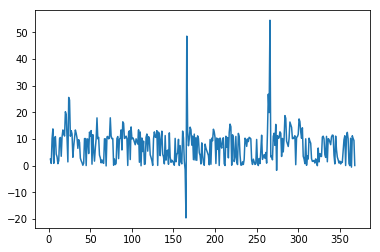

In [40]:
plt.plot(orders.index, orders.loc[: ,'mid_tte_val'])

In [41]:
orders.query('mid_tte_val >= 0').describe()

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,109155.479109,-0.130919,253782.729805,1.355716,-4.722813,-5.114513,7.604992
std,808.112791,0.992777,107274.657320,0.006022,2.747944,11.822379,6.128650
min,107638.000000,-1.000000,60000.000000,1.346570,-23.250000,-75.950000,0.001000
25%,108507.000000,-1.000000,180000.000000,1.351890,-6.200000,-7.100000,2.278500
50%,109231.000000,-1.000000,200000.000000,1.353840,-4.000000,0.000000,9.162000
75%,109910.000000,1.000000,310000.000000,1.357495,-2.800000,0.900000,10.817000
max,110533.000000,1.000000,560000.000000,1.374200,-0.600000,13.950000,54.523000


In [42]:
def omm_side(tickdata, localorders, max_tte, stoploss):
    tindex = 0
    for index, order in localorders.iterrows():
        time_to_execute = td(seconds = max_tte)
        time_to_execute = order.loc['datetime'] + time_to_execute
        while(tindex < tickdata.shape[0] and order['datetime'] > tickdata.loc[tindex, 'DateTime']):
            tindex += 1
        final_index = tindex - 1 if tindex > 0 else tindex
        iter_index = final_index
        start_bid_price = tickdata.loc[iter_index, 'Bid']
        start_ask_price = tickdata.loc[iter_index, 'Ask']
        start_mid = tickdata.loc[iter_index, 'midprice']
        start_time = order.loc['datetime']
        while iter_index <= tickdata.shape[0]:
            if(time_to_execute <= tickdata.loc[iter_index, 'DateTime']):
                # execute the order
                if(order['buy/sell'] == 1):
                    orders.loc[index, 'omm_side_pnl'] = order['notional'] * (start_mid - tickdata.loc[iter_index, 'Ask'])
                else:
                    orders.loc[index, 'omm_side_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_mid)
                orders.loc[index, 'side_tte'] = True
                orders.loc[index, 'side_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
            
            elif( (start_bid_price >= tickdata.loc[iter_index, 'Ask'] and order['buy/sell'] == 1) or (start_ask_price <= tickdata.loc[iter_index, 'Bid'] and order['buy/sell'] == -1)):
                # execute the order
                if(order['buy/sell'] == 1):
                    orders.loc[index, 'omm_side_pnl'] = order['notional'] * (start_mid - tickdata.loc[iter_index, 'Ask'])
                else:
                    orders.loc[index, 'omm_side_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_mid)
                orders.loc[index, 'side_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            elif(order['buy/sell'] == 1 and (tickdata.loc[iter_index, 'Ask'] - start_bid_price) / start_bid_price >= stoploss/100):
                # execute the order
                orders.loc[index, 'omm_side_pnl'] = order['notional'] * (start_mid - tickdata.loc[iter_index, 'Ask'])
                orders.loc[index, 'side_stoploss'] = True
                orders.loc[index, 'side_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            elif(order['buy/sell'] == -1 and (start_ask_price - tickdata.loc[iter_index, 'Bid']) / start_ask_price >= stoploss/100):
                # execute the order
                orders.loc[index, 'omm_side_pnl'] = order['notional'] * (tickdata.loc[iter_index, 'Bid'] - start_mid)
                orders.loc[index, 'side_stoploss'] = True
                orders.loc[index, 'side_tte_val'] = (tickdata.loc[iter_index, 'DateTime'] - start_time).total_seconds()
                break
                
            iter_index += 1

In [43]:
omm_side(data, orders, 10, .01)

# OMM SIDE results appended in orders

In [44]:
orders.head(10).round(2)

,trade_id,buy/sell,notional,price,datetime,instrument,alpha,MT_PnL,omm_mid_pnl,mid_tte_val,mid_tte,mid_stoploss,omm_side_pnl,side_tte_val,side_stoploss,side_tte
2,107638,-1,310000,1.35,2018-01-08 07:38:48,GBP/USD,SOM,-1.55,4.65,2.41,NaN,NaN,4.65,2.41,NaN,NaN
3,107649,-1,310000,1.35,2018-01-08 08:10:55,GBP/USD,SOM,-7.75,1.55,0.80,NaN,NaN,7.75,6.08,NaN,NaN
4,107654,-1,320000,1.35,2018-01-08 08:19:10,GBP/USD,SOM,-6.40,-35.20,10.11,True,NaN,-38.40,6.76,True,NaN
5,107664,-1,200000,1.35,2018-01-08 08:23:16,GBP/USD,SOM,-3.00,-3.00,13.75,True,NaN,-3.00,13.75,NaN,True
6,107670,-1,490000,1.35,2018-01-08 08:34:40,GBP/USD,SOM,-4.90,0.00,0.82,NaN,NaN,4.90,0.88,NaN,NaN
7,107726,1,200000,1.36,2018-01-08 11:25:13,GBP/USD,SOM,-3.00,-11.00,10.39,True,NaN,-11.00,10.39,NaN,True
8,107733,1,310000,1.36,2018-01-08 11:42:08,GBP/USD,SOM,-7.75,-29.45,10.87,True,NaN,-29.45,10.87,NaN,True
9,107737,1,310000,1.36,2018-01-08 12:15:34,GBP/USD,SOM,-6.20,3.10,4.26,NaN,NaN,6.20,4.32,NaN,NaN
10,107738,1,310000,1.36,2018-01-08 12:15:35,GBP/USD,SOM,-6.20,3.10,3.26,NaN,NaN,6.20,3.32,NaN,NaN
11,107739,1,320000,1.36,2018-01-08 12:20:20,GBP/USD,SOM,-4.80,1.60,0.70,NaN,NaN,4.80,6.36,NaN,NaN


In [45]:
omm_side_pnl_describe = orders['omm_side_pnl'].describe()
omm_side_pnl_describe

count    367.000000
mean      -5.127766
std       12.585024
min      -67.200000
25%       -7.750000
50%       -2.700000
75%        3.000000
max       14.700000
Name: omm_side_pnl, dtype: float64

In [61]:
orders.query('side_stoploss == True').describe().round(2)

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val,omm_side_pnl,side_tte_val
count,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00
mean,109182.20,0.11,250285.71,1.36,-6.46,-25.48,14.82,-30.43,5.31
std,786.15,1.00,112137.21,0.01,7.36,19.96,12.36,14.03,22.56
min,107654.00,-1.00,60000.00,1.35,-52.00,-75.95,-19.64,-67.20,-122.54
25%,108568.50,-1.00,180000.00,1.35,-6.40,-29.40,5.46,-38.80,5.18
50%,109161.00,1.00,180000.00,1.35,-4.50,-25.20,14.29,-23.33,8.87
75%,109814.75,1.00,320000.00,1.36,-2.78,-12.65,24.09,-21.60,13.28
max,110523.00,1.00,560000.00,1.37,-1.20,4.90,54.52,-7.20,23.96


In [47]:
orders.query('side_tte == True').describe().round(2)

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val,omm_side_pnl,side_tte_val
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,109033.32,-0.33,261210.26,1.36,-5.03,-5.50,10.32,-6.86,11.97
std,783.60,0.95,109445.90,0.01,2.57,6.50,4.46,7.12,2.85
min,107664.00,-1.00,60000.00,1.35,-14.70,-35.20,0.37,-40.80,10.01
25%,108418.50,-1.00,180000.00,1.35,-6.30,-7.75,10.02,-9.00,10.24
50%,109017.00,-1.00,200000.00,1.35,-4.00,-4.20,10.46,-5.60,10.98
75%,109768.00,1.00,310000.00,1.36,-3.23,0.00,12.10,-3.00,12.52
max,110485.00,1.00,560000.00,1.37,-1.10,6.20,26.78,14.70,26.78


In [48]:
orders.describe().loc[:,'MT_PnL':].round(2)

,MT_PnL,omm_mid_pnl,mid_tte_val,omm_side_pnl,side_tte_val
count,367.00,367.00,367.00,367.00,367.00
mean,-4.76,-5.14,7.37,-5.13,7.60
std,3.73,11.97,6.33,12.59,9.79
min,-52.00,-75.95,-19.64,-67.20,-122.54
25%,-6.20,-7.00,2.04,-7.75,3.85
50%,-4.00,0.00,8.81,-2.70,10.04
75%,-2.70,0.90,10.78,3.00,11.04
max,-0.00,13.95,54.52,14.70,26.78


In [49]:
orders.query('side_tte_val >= 0').describe().round(2)

,trade_id,buy/sell,notional,price,MT_PnL,omm_mid_pnl,mid_tte_val,omm_side_pnl,side_tte_val
count,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00,356.00
mean,109152.07,-0.12,253983.15,1.36,-4.62,-4.89,7.37,-4.99,8.50
std,809.96,0.99,107576.37,0.01,2.47,11.59,5.18,12.46,4.80
min,107638.00,-1.00,60000.00,1.35,-14.70,-75.95,0.00,-67.20,0.01
25%,108505.25,-1.00,180000.00,1.35,-6.20,-7.00,2.24,-7.75,4.31
50%,109229.00,-1.00,200000.00,1.35,-4.00,0.00,9.12,-2.70,10.06
75%,109912.75,1.00,310000.00,1.36,-2.77,0.90,10.79,3.10,11.06
max,110533.00,1.00,560000.00,1.37,-0.60,13.95,26.78,14.70,26.78


# Recapitulating Table

In [50]:
recap_table = pd.DataFrame(columns=['Approach', 'Average PNL', 'Median PNL', 'Min PNL', 'Max PNL', 'Avg TTE(seconds)', 'Median TTE(seconds)', 'Total number of SL triggered', 'Total numbers of times order executed on max TTE'])

In [51]:
omm_side_pnl_describe

count    367.000000
mean      -5.127766
std       12.585024
min      -67.200000
25%       -7.750000
50%       -2.700000
75%        3.000000
max       14.700000
Name: omm_side_pnl, dtype: float64

### Market Taking approach

In [52]:
recap_table.loc[0, 'Approach'] = 'Market Taking'
recap_table.loc[0, 'Average PNL'] = market_taking_describe['mean'].round(2)
recap_table.loc[0, 'Median PNL'] = market_taking_describe['50%'].round(2)
recap_table.loc[0, 'Min PNL'] = market_taking_describe['min'].round(2)
recap_table.loc[0, 'Max PNL'] = market_taking_describe['max'].round(2)

### OMM Mid approach

In [53]:
orders.query('mid_stoploss == True').describe()['trade_id']['count']

14.0

In [54]:
recap_table.loc[1, 'Approach'] = 'OMM Mid'
recap_table.loc[1, 'Average PNL'] = omm_mid_pnl_describe['mean'].round(2)
recap_table.loc[1, 'Median PNL'] = omm_mid_pnl_describe['50%'].round(2)
recap_table.loc[1, 'Min PNL'] = omm_mid_pnl_describe['min'].round(2)
recap_table.loc[1, 'Max PNL'] = omm_mid_pnl_describe['max'].round(2)
recap_table.loc[1, 'Avg TTE(seconds)'] = orders.describe()['mid_tte_val']['mean'].round(2)
recap_table.loc[1, 'Median TTE(seconds)'] = orders.describe()['mid_tte_val']['50%'].round(2)
recap_table.loc[1, 'Total number of SL triggered'] = orders.query('mid_stoploss == True').describe()['trade_id']['count']
recap_table.loc[1, 'Total numbers of times order executed on max TTE'] = orders.query('side_stoploss == True').describe()['trade_id']['count']

### OMM Side approach

In [55]:
recap_table.loc[2, 'Approach'] = 'OMM Side'
recap_table.loc[2, 'Average PNL'] = omm_side_pnl_describe['mean'].round(2)
recap_table.loc[2, 'Median PNL'] = omm_side_pnl_describe['50%'].round(2)
recap_table.loc[2, 'Min PNL'] = omm_side_pnl_describe['min'].round(2)
recap_table.loc[2, 'Max PNL'] = omm_side_pnl_describe['max'].round(2)
recap_table.loc[2, 'Avg TTE(seconds)'] = orders.describe()['side_tte_val']['mean'].round(2)
recap_table.loc[2, 'Median TTE(seconds)'] = orders.describe()['side_tte_val']['50%'].round(2)
recap_table.loc[2, 'Total number of SL triggered'] = orders.query('side_stoploss == True').describe()['trade_id']['count']
recap_table.loc[2, 'Total numbers of times order executed on max TTE'] = orders.query('side_stoploss == True').describe()['trade_id']['count']
recap_table

,Approach,Average PNL,Median PNL,Min PNL,Max PNL,Avg TTE(seconds),Median TTE(seconds),Total number of SL triggered,Total numbers of times order executed on max TTE
0,Market Taking,-4.76,-4,-52,-0,NaN,NaN,NaN,NaN
1,OMM Mid,-5.14,0,-75.95,13.95,7.37,8.81,14,34
2,OMM Side,-5.13,-2.7,-67.2,14.7,7.6,10.04,34,34


## Further Analysis

In [56]:
tte_list = [2,3,5,8,12,15,18,21,24]
const_loss = 0.01 # percent

In [57]:
outputMedianPNL = []
for tte in tte_list:
    omm_mid(data, orders, tte, const_loss)
    outputMedianPNL.append(orders['omm_mid_pnl'].describe()['50%'])

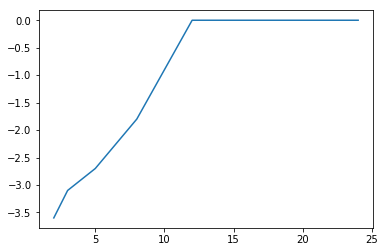

In [58]:
plt.plot(tte_list, outputMedianPNL)

In [59]:
outputMedianPNL = []
for tte in tte_list:
    omm_side(data, orders, tte, const_loss)
    outputMedianPNL.append(orders['omm_side_pnl'].describe()['50%'])

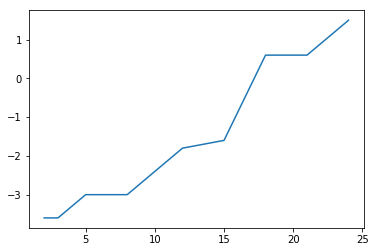

In [60]:
plt.plot(tte_list, outputMedianPNL)

### The OMM Side gives positive PNL while OMM Mid approach never goes above zero PNL.